## Ordinary Differential Equations (ODE)


Differential equations help to model the relations between variables and their derivatives. They are used to model systems in every engineering and science field. For example, a simple differential equation relates the acceleration of a car with its position. 

In general, finding exact solutions to differential equations is difficult and ofter imposible. Therefore, numerical solutions are critical to making these equations useful for designing and understanding engineering and science systems.

Because differential equations are so common in engineering, physics, and mathematics, the study of them is a vast and rich field. Today, we are going to learn about ordinary differential equations with specified initial values, a subclass of differential equations problems called initial value problems.

An ordinary differential equation relates a function $f(x)$, its independent variable $x$, and any numnber of its derivatives. In general, an ODE can be expressed as 

$$
F\left(x, f(x), \frac{df(x)}{dx}, \frac{d^2f(x)}{dx^2}, \frac{d^3f(x)}{dx^3}, \ldots, \frac{d^{n-1}f(x)}{dx^{n-1}}\right) = \frac{d^{n}f(x)}{dx^{n}},
$$

where $F$ is an arbitraty functions. 

#### Example 

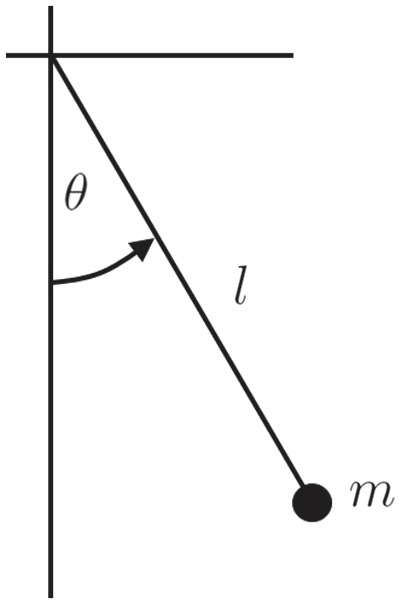

The ODE that describes a inverted pendulum is given by 
$$
ml\frac{d^2\Theta(t)}{dt^2} = -mg \sin(\Theta(t)).
$$

where
$$
\begin{matrix}
l & -> & \text{Pendumum lenght} \\
m & -> & \text{Pendumum mass} \\
g & -> & \text{Gravity} \\
\Theta(t) & -> & \text{Angle the pendulum makes with the vertical } \\
\end{matrix}
$$

A general solution to a differential equation is a $h(x)$ that satisfies the differential equation.

If we assume that the pendulum doesn't move too much, then $\Theta(t) \approx \sin(\Theta(t))$ 
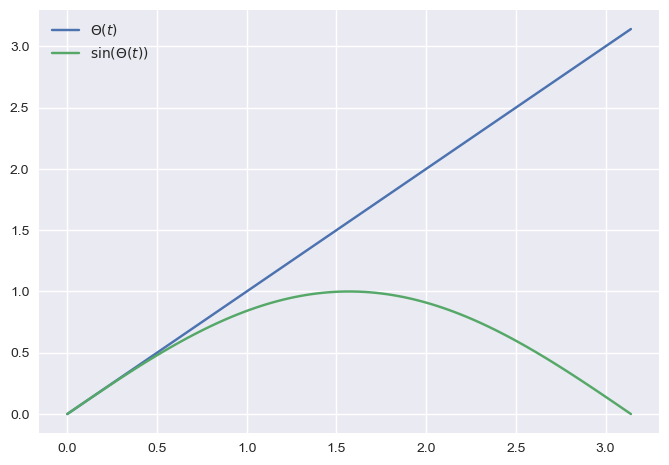

we can approximate the differential equation for

$$
l\frac{d^2\Theta(t)}{dt^2} = -g \Theta(t).
$$

A solution for this equation is given by 
$$
\Theta(t) = \cos\left(\sqrt{\frac{g}{l}}t\right)
$$

We can verify this solution by finding its derivatives and using them in the original equation 
$$
\begin{eqnarray}
\frac{d\Theta(t)}{dt} & = -\sqrt{\frac{g}{l}}\sin\left(\sqrt{\frac{g}{l}}t\right)  \\
\frac{d^2\Theta(t)}{dt^2} & = -\frac{g}{l}\cos\left(\sqrt{\frac{g}{l}}t\right),
\end{eqnarray}
$$
or
$$
l\frac{d^2\Theta(t)}{dt^2} = -g \Theta(t).
$$


If we go beyond the assumption of small angles ($\Theta > 1 deg$) then this solution is no longer valid. However, an exact solution for the general problem is difficult to determine. Numerical methods can help us to solve this problem without the need to determine an analytical solution

## Initial Value Problem 

For a certain class of ordinary differential equations, the initial value is sufficient to find a unique particular solution. Finding a solution to an ODE given an initial value is called the initial value problem.

For an ODE of order n, the initial value is a known value for the $0^{th}$ to $(n−1)^{th}$ derivatives at $x=0$.

### Reduction of order 

Many numerical methods for solving initial value problems are designed specifically to solve first-order differential equations. To make these solvers useful for solving higher order differential equations, we must often reduce the order of the differential equation to first order.

Consider a generic differential equation of order $n$
$$
f^{(n)}(t) = F\left(t, f(t), f^{(1)}(t), f^{(2)}(t), f^{(3)}(t),\ldots, f^{(n-1)}(t)\right),
$$

where $f^{(n)}(t) = \frac{df^{n}}{dt^{n}}$ is the $n^{th}$ order derivative. 

To reduce the order of the system, consider a state equation given by 

$$
S(t) =\left[\begin{array}{c}
f(t) \\
f^{(1)}(t) \\
f^{(2)}(t) \\
f^{(3)}(t) \\
\cdots \\
f^{(n-1)}(t)
\end{array}\right]
$$

and the derivative of the state is
$$
\frac{dS(t)}{dt} =\left[\begin{array}{c}
f^{(1)}(t) \\
f^{(2)}(t) \\
f^{(3)}(t) \\
f^{(4)}(t) \\
\cdots \\
f^{(n)}(t)
\end{array}\right]\!=\!\left[\begin{array}{c}
f^{(1)}(t) \\
f^{(2)}(t) \\
f^{(3)}(t) \\
f^{(4)}(t) \\
\cdots \\
F\left(t, f(t), f^{(1)}(t),\ldots, f^{(n-1)}(t)\right)
\end{array}\right]\!=\!\left[\begin{array}{c}
S_2(t) \\
S_3(t) \\
S_4(t) \\
S_5(t) \\
\cdots \\
F\left(t, S_1(t), S_2(t),\ldots, S_{n-1}(t)\right)
\end{array}\right].
$$

With the state written in this way, $\frac{dS(t)}{dt}$ can be written using only $S(t)$.  This equation is in the form of a first-order differential equation in $S$. Essentially, what we have done is turn an $n^{th}$ order ODE into $n$ first order ODEs that are coupled together, meaning they share the same terms.

#### Example
$$
\ddot{\Theta}(t) = -\frac{g}{l} \Theta(t).
$$

The state vector can be written as
$$
S(t) =\left[\begin{array}{c}
\Theta(t) \\
\dot{\Theta}(t)
\end{array}\right] = \left[\begin{array}{c}
S_{1}(t) \\
S_{2}(t)
\end{array}\right]
$$

Taking the derivative of the state vector gives 
$$
\frac{dS(t)}{dt} =\left[\begin{array}{c}
\dot{\Theta}(t)\\
\ddot{\Theta}(t)
\end{array}\right] = \left[\begin{array}{c}
S_{2}(t)\\
-\frac{g}{l} S_{1}(t)
\end{array}\right]
$$

or

$$
\frac{dS(t)}{dt} =\left[\begin{array}{c}
0 & 1\\
-\frac{g}{l} & 0
\end{array}\right]  \left[\begin{array}{c}
S_{1}(t) \\
S_{2}(t)
\end{array}\right] =\left[\begin{array}{c}
0 & 1\\
-\frac{g}{l} & 0
\end{array}\right]  S(t)
$$
ODEs that can be written in this way are said to be linear ODEs.

#### Exercise A
Here is a simple model to describe population change
$$
\begin{eqnarray}
\frac{dr(t)}{dt} &= 4r(t) - 2w(t) \\
\frac{dw(t)}{dt} &= r(t) + w(t).
\end{eqnarray}
$$

Demonstrate that the state equation for this system is 
$$
\frac{dS(t)}{dt} = \left[\begin{array}{cc}
4 & -2 \\
1 & 1
\end{array}\right]S(t).
$$

#### Exercise B
Here is a simple model to a spring-daper-mass system

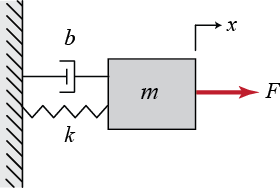

$$
m\ddot{x} + b\dot{x} + kx =  F(t),
$$
where $F(t)$ is the force applied to the mass.

Demonstrate that the state equation for this system is 
$$
\frac{dS(t)}{dt} = \left[\begin{array}{cc}
0 & 1 \\
-\frac{k}{m} & -\frac{b}{m}
\end{array}\right]S(t) + \left[\begin{array}{cc}
0  \\
\frac{1}{m}
\end{array}\right]F(t).
$$
and 
$$
S(t) = \left[\begin{array}{cc}
x(t) \\
\dot{x}(t)
\end{array}\right] 
$$

#### Exercise C
Here is a simple model to a circuit with a resistor, capacitor, and inductance 

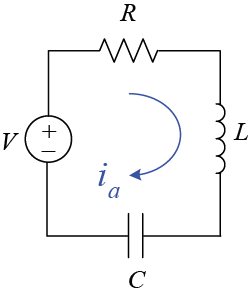

$$
Ri + L\frac{di}{dt} + \frac{1}{C}\int idt = V(t),
$$
where $V(t)$ is the voltage applied to the circuit.

Demonstrate that the state equation for this system is 
$$
\frac{dS(t)}{dt} = \left[\begin{array}{cc}
0 & 1 \\
-\frac{1}{LC} & -\frac{R}{L}
\end{array}\right]S(t)+ \left[\begin{array}{cc}
0  \\
\frac{1}{L}
\end{array}\right]V(t).
$$
and 
$$
S(t) = \left[\begin{array}{cc}
\int i(t)dt \\
i(t)
\end{array}\right]
$$

### Exercise D
Write a state representation of the following third order differential equation 
$$
\dddot{x}+7\ddot{x}+19\dot{x}+13x = 26u
$$

Hint, use the following state vector
$$
S(t) = \left[\begin{array}{c}
x \\
\dot{x} \\
\ddot{x}
\end{array}\right] = \left[\begin{array}{c}
S_{1}(t) \\
S_{2}(t)\\
S_{3}(t)
\end{array}\right]
$$



## Euler Method for Differential Equations 

Assume a first order differential equation $\frac{dS(t)}{dt} = F(t,S(t))$, and let $t$ be a evenly spaced grid on the interval $[t_0,t_f]$.

Without loss of generality, we assume that $t_0=0$, and that $t_f=Nh$ for some positive integer $N$, with $h$ defining the space beteween elements in the grid. 

The linear approximation of $S(t)$ around $t_j$ and $t_{j+1}$ is given by 
$$
S(t_{j+1}) = S(t_j) + (t_{j+1} - t_j)\frac{dS(t_j)}{dt},
$$
or
$$
S(t_{j+1}) = S(t_j) + hF(t_j, S(t_j)).
$$
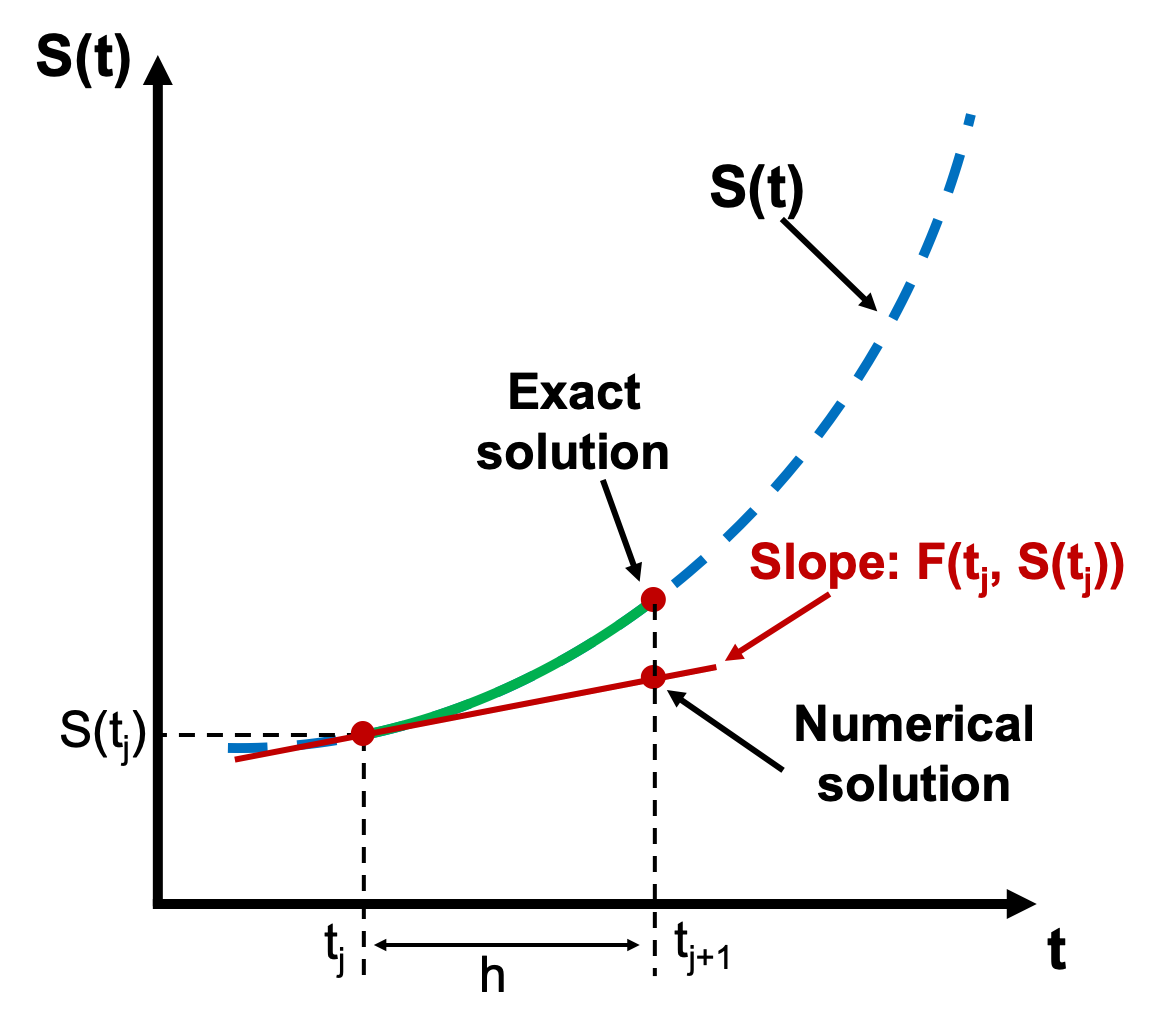


This formula is called the **Explicit Euler Formula**, and it allows us to compute an approximation for the state at $S(t_{j+1})$ given the state at $S(t_j)$. Starting from a given initial value of $S_{0}=S(t_{0})$.

To apply the Euler formula given a function $F(t,S(t)) that computes $\dot{S}(t)$, a numerical grid $t$ with interval $h$, and initial values $S_0 = S(t_0)$, we can compute $S(t)$ following a series of steps:

1. Store $S_0 = S(t_0)$ in an array, $S$.
2. Compute $S(t_1) = S_0 + hF(t_0, S_0)$.
3. Store  $S_1 = S(t_1)$ in $S$.
4. Compute $S(t_2) = S_1 + hF(t_1, S_1)$
5. Store  $S_2 = S(t_2)$ in $S$.
6. ...
7. Compute $S(t_f) = S_{f-1} + hF(t_{f-1}, S_{f-1})$.
8. Store $S_f=S(t_f) in S$.

S is an approximation of the solution to the initial value problem.

### Example

$$
\frac{df}{dt} = e^{-t}
$$
with 
$f_{0}=-1$.

The exact solution is $f(t) = -e^{-t}$. 

We can find an approximate solution for this initial value problem between 0 and 1 with increments of 0.1 using the Euler formula

In [24]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

#function to solve 
def func(t):
    return np.exp(-t)
    
h = 0.1
t = np.arange(0,1+h,h) #grid

s0 = -1 # initial value 

s = np.zeros(len(t))
s[0] = s0
for i in range(0,len(t)-1):
    s[i+1] = s[i] + h*func(t[i])

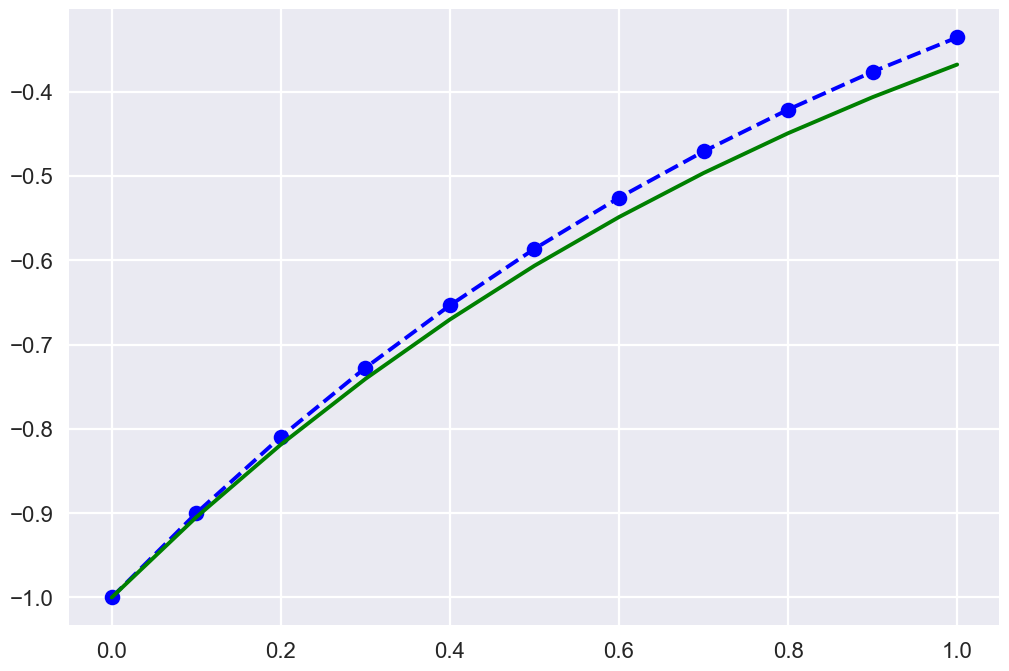

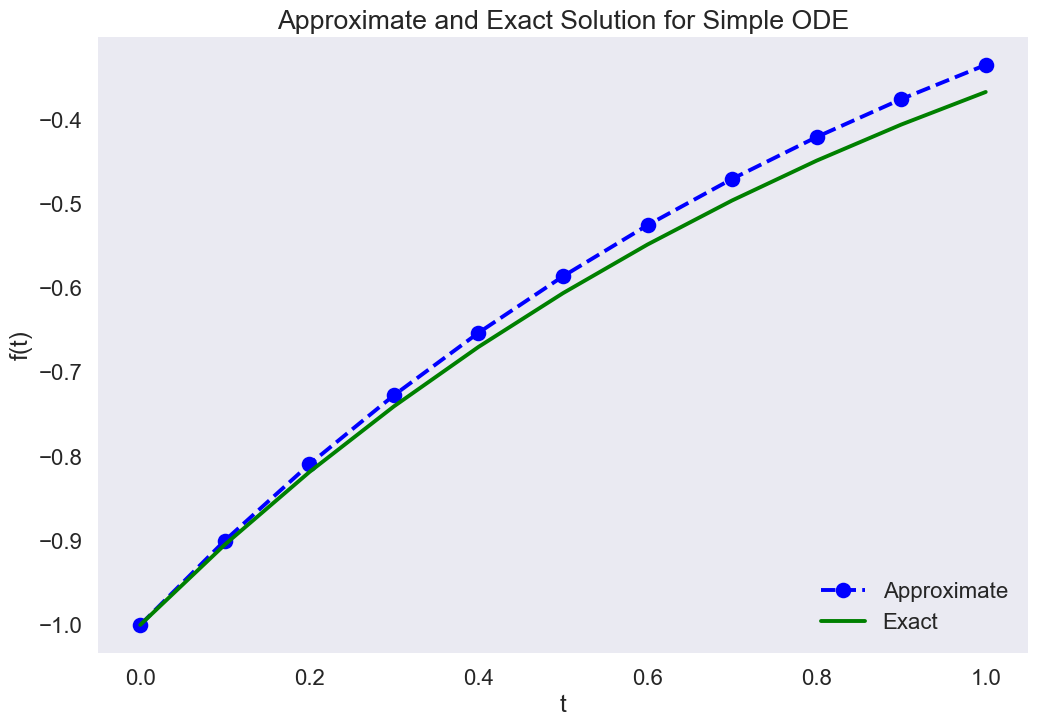

In [27]:
plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, -np.exp(-t), 'g', label='Exact')
plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, -np.exp(-t), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [21]:
t[i]

0.0